# Overview

In this notebook, the data will be explored in an effort to better understand the differences between the four classes of data. The notebook will include the following:

1. [Imports](#Imports)
2. [Class Imbalance](#Class-Imbalance)
3. [Sentiment](#Sentiment)
4. [Tweet Length](#Tweet-Length)
5. [Hyperlinks](#Hyperlinks)
6. [Retweets](#Retweets)
7. [Mentions](#Mentions)
8. [Hashtags](#Hashtags)
9. [Punctuation](#Punctuation)
10. [Uppercase Words](#Uppercase-Letters)
11. [Word Associations](#Word-Associations)

# Imports

In [1]:
# Necessary modules and packages
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import punkt
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import string, re

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['figure.figsize'] = 16, 8
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Reading in data
data = pd.read_csv('data/twitter_sentiment_data.csv')

Many functions are used to simplify the code represented in this notebook. If you would like to see the functions first-hand, check them out [here](./building_classifier_functions.py)

In [2]:
from building_classifier_functions import *

# Class Imbalance

Text(0, 0.5, 'Percentage')

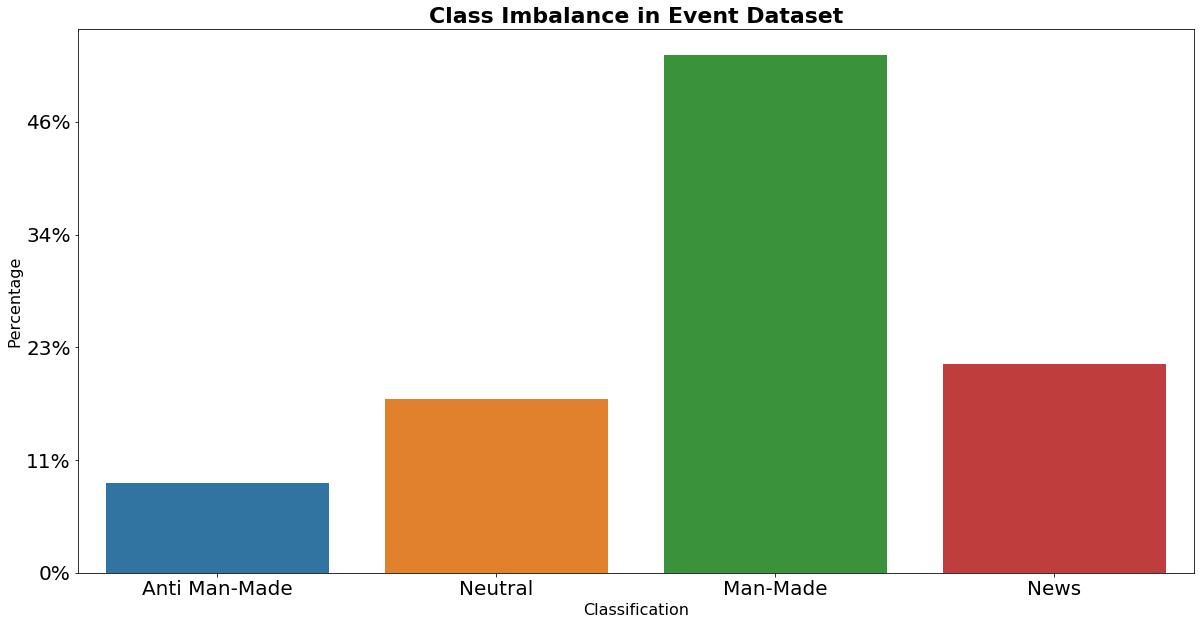

In [3]:
# Getting the length of each class subset
class_imbalance = [len(data[data.sentiment == -1]), 
                   len(data[data.sentiment == 0]), 
                   len(data[data.sentiment == 1]), 
                   len(data[data.sentiment == 2])]

# specifying classes for graphing
class_labels = ['Anti Man-Made','Neutral','Man-Made','News']

# graphing class imbalance
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(class_labels, class_imbalance, ax = ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(43943))
plt.title('Class Imbalance in Event Dataset', fontsize=22, fontweight='bold')
plt.xlabel('Classification', fontsize=16)
plt.ylabel('Percentage', fontsize=16)

# Sentiment

## Textblob

### Polarity

In [4]:
# creating polarity score column from Textblob polarity
data['polarity_score'] = data['message'].apply(lambda x: TextBlob(x).sentiment.polarity)

Text(0, 0.5, 'Percentage')

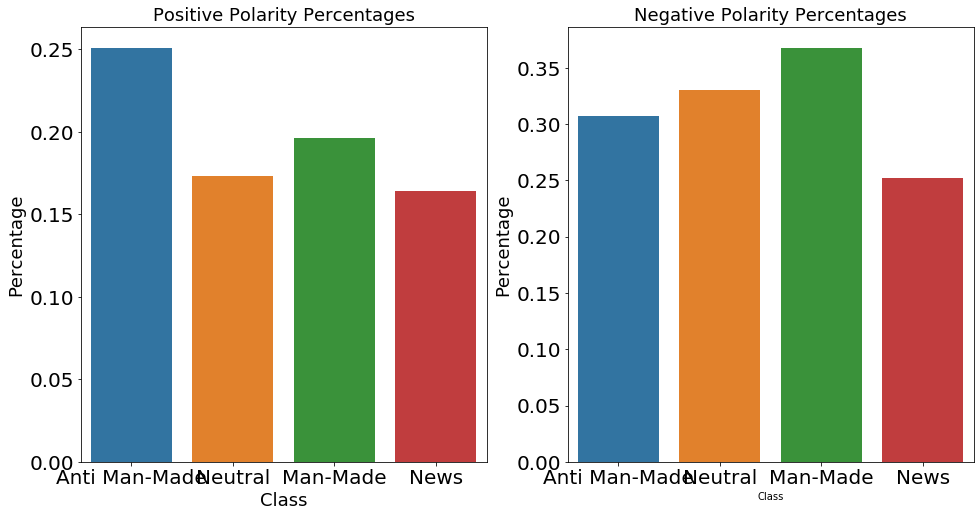

In [5]:
# Create dataframe subsets
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

# Get percentages for below threshold
below_perc_anit = round((len(anti[anti['polarity_score'] < 0]) / len(anti)), 3)
below_perc_neutral = round((len(neutral[neutral['polarity_score'] < 0]) / len(neutral)), 3)
below_perc_man = round((len(man[man['polarity_score'] < 0]) / len(man)), 3)
below_perc_news = round((len(news[news['polarity_score'] < 0]) / len(news)), 3)

# Get percentages for above threshold
above_perc_anit = round((len(anti[anti['polarity_score'] > 0]) / len(anti)), 3)
above_perc_neutral = round((len(neutral[neutral['polarity_score'] > 0]) / len(neutral)), 3)
above_perc_man = round((len(man[man['polarity_score'] > 0]) / len(man)), 3)
above_perc_news = round((len(news[news['polarity_score'] > 0]) / len(news)), 3)

#Plotting positive and negative polarity
fig, (ax1, ax2) = plt.subplots(1,2)
sns.barplot(class_labels, [below_perc_anit, below_perc_neutral, below_perc_man, below_perc_news], ax=ax1)
sns.barplot(class_labels, [above_perc_anit, above_perc_neutral, above_perc_man, above_perc_news], ax=ax2)
ax1.set_title('Positive Polarity Percentages', fontsize=18)
ax1.set_xlabel('Class', fontsize=18)
ax1.set_ylabel('Percentage', fontsize=18)
ax2.set_title('Negative Polarity Percentages', fontsize=18)
ax2.set_xlabel('Class')
ax2.set_ylabel('Percentage', fontsize=18)

### Subjectivity

In [6]:
# creating subjectivity score column from Textblob subjectivity
data['subjectivity_score'] = data['message'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

Text(0, 0.5, 'Percentage')

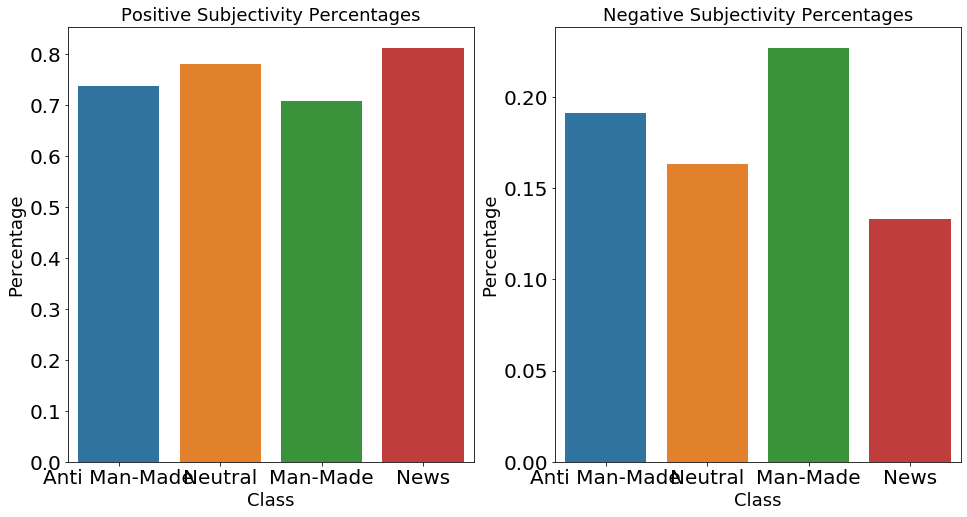

In [7]:
# Create dataframe subsets
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

# Get percentages for below threshold
below_perc_anit = round((len(anti[anti['subjectivity_score'] < 0.5]) / len(anti)), 3)
below_perc_neutral = round((len(neutral[neutral['subjectivity_score'] < 0.5]) / len(neutral)), 3)
below_perc_man = round((len(man[man['subjectivity_score'] < 0.5]) / len(man)), 3)
below_perc_news = round((len(news[news['subjectivity_score'] < 0.5]) / len(news)), 3)

# Get percentages for above threshold
above_perc_anit = round((len(anti[anti['subjectivity_score'] > 0.5]) / len(anti)), 3)
above_perc_neutral = round((len(neutral[neutral['subjectivity_score'] > 0.5]) / len(neutral)), 3)
above_perc_man = round((len(man[man['subjectivity_score'] > 0.5]) / len(man)), 3)
above_perc_news = round((len(news[news['subjectivity_score'] > 0.5]) / len(news)), 3)

#Plotting positive and negative polarity
fig, (ax1, ax2) = plt.subplots(1,2)
sns.barplot(class_labels, [below_perc_anit, below_perc_neutral, below_perc_man, below_perc_news], ax=ax1)
sns.barplot(class_labels, [above_perc_anit, above_perc_neutral, above_perc_man, above_perc_news], ax=ax2)
ax1.set_title('Positive Subjectivity Percentages', fontsize=18)
ax1.set_xlabel('Class', fontsize=18)
ax1.set_ylabel('Percentage', fontsize=18)
ax2.set_title('Negative Subjectivity Percentages', fontsize=18)
ax2.set_xlabel('Class', fontsize=18)
ax2.set_ylabel('Percentage', fontsize=18)

### Plotting Polarity vs Subjectivity

Text(0, 0.5, 'Subjectivity')

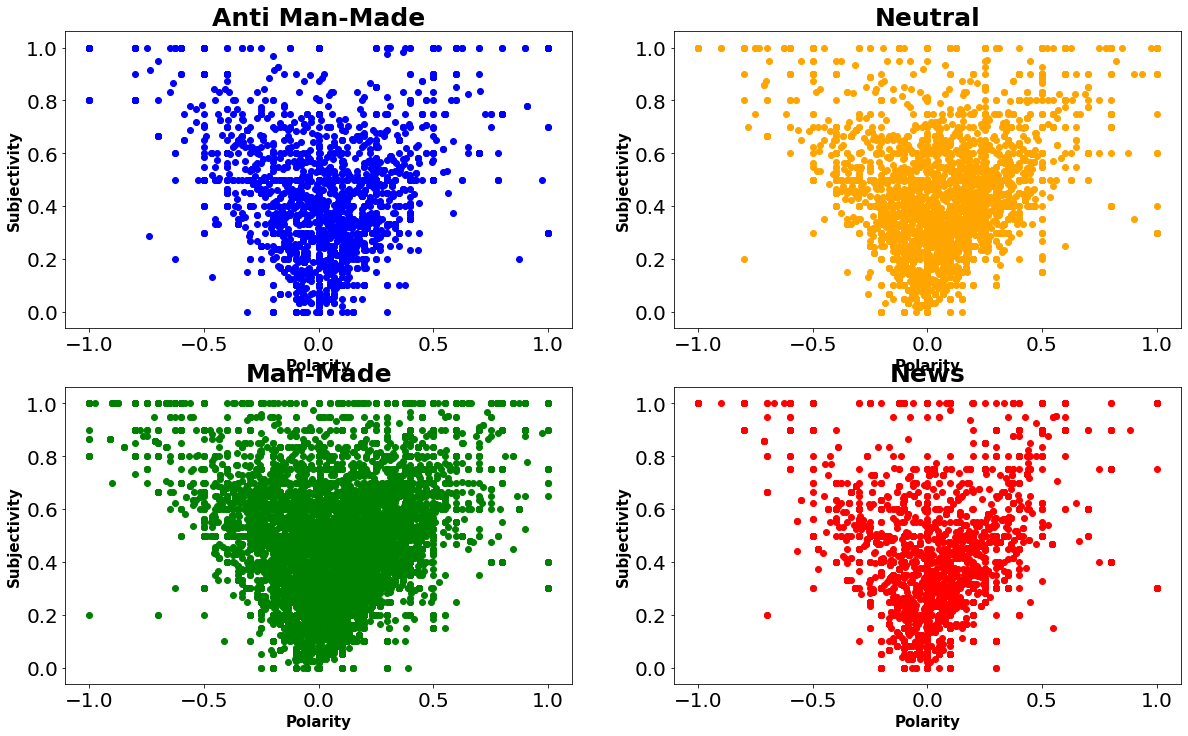

In [8]:
# Subsetting dataframe by class
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

# Configuring subplots for sentiment graphing
fig, ax = plt.subplots(2,2, figsize=(20,12))

# Anti man-made subplot
ax[0,0].scatter(anti['polarity_score'], anti['subjectivity_score'], color='blue')
ax[0,0].set_title('Anti Man-Made', fontsize=25, fontweight='bold')
ax[0,0].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[0,0].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# Neutral subplot
ax[0,1].scatter(neutral['polarity_score'], neutral['subjectivity_score'], color='orange')
ax[0,1].set_title('Neutral', fontsize=25, fontweight='bold')
ax[0,1].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[0,1].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# Man-made subplot
ax[1,0].scatter(man['polarity_score'], man['subjectivity_score'], color='green')
ax[1,0].set_title('Man-Made', fontsize=25, fontweight='bold')
ax[1,0].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[1,0].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# News subplot
ax[1,1].scatter(news['polarity_score'], news['subjectivity_score'], color='red')
ax[1,1].set_title('News', fontsize=25, fontweight='bold')
ax[1,1].set_xlabel('Polarity', fontsize=15, fontweight='bold')
ax[1,1].set_ylabel('Subjectivity', fontsize=15, fontweight='bold')

# Tweet Length

Text(0, 0.5, 'Median')

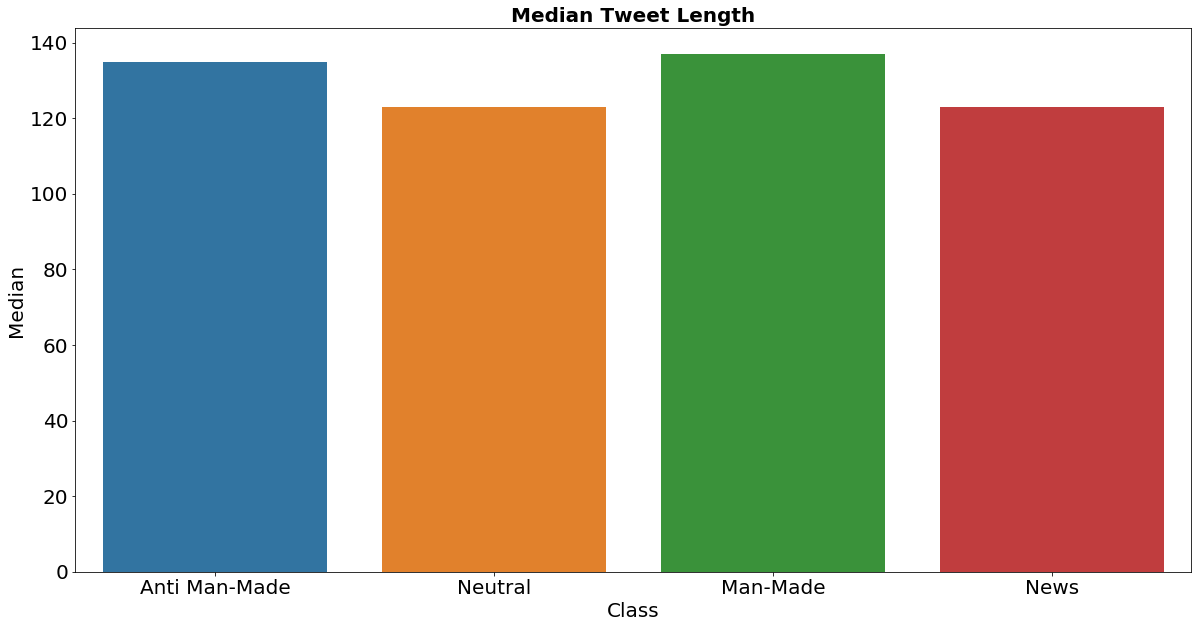

In [9]:
# Creating tweet length column
data['text_length'] = data['message'].apply(lambda x: len(x))

# Resetting class subsets to include new column
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

# Getting median tweet length for each class
avg_length_anti = anti.text_length.median()
avg_length_neutral = neutral.text_length.median()
avg_length_man = man.text_length.median()
avg_length_news = news.text_length.median()

# Specifying y-values
length_medians = (avg_length_anti, avg_length_neutral, avg_length_man, avg_length_news)

# Building graph
plt.figure(figsize=(20,10))
sns.barplot(class_labels, length_medians)
plt.title('Median Tweet Length', fontsize=20, fontweight='bold')
plt.xlabel('Class', fontsize=20)
plt.ylabel('Median', fontsize=20)

# Hyperlinks

## Hyperlink Present

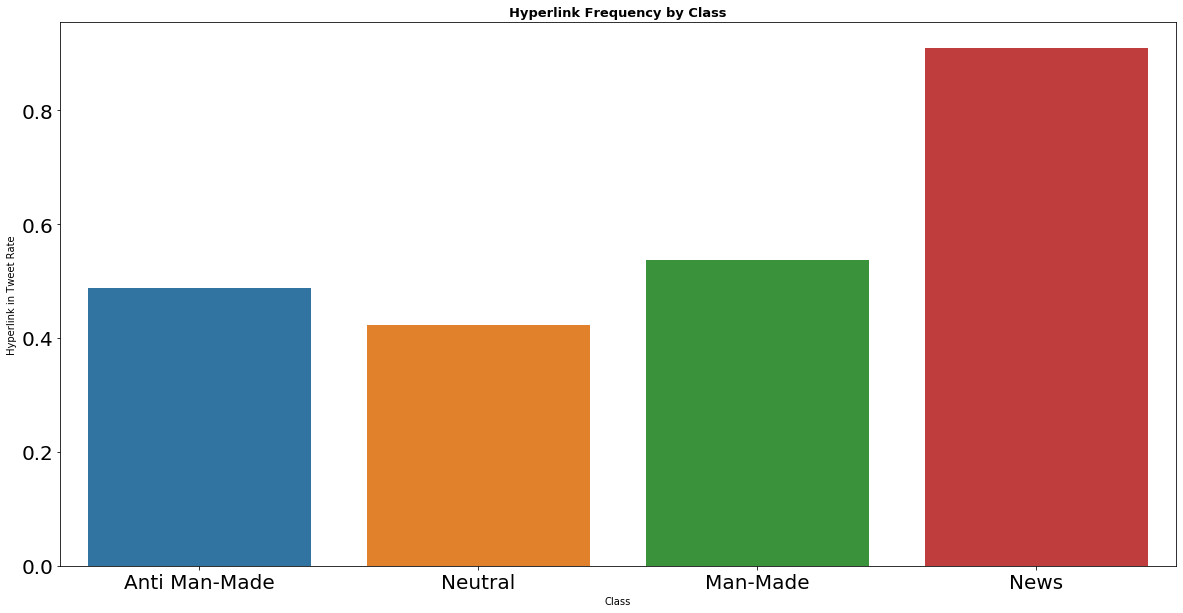

In [10]:
element_present_plot('hyperlink_present','http','Hyperlink')

# Retweets

## Retweet Present

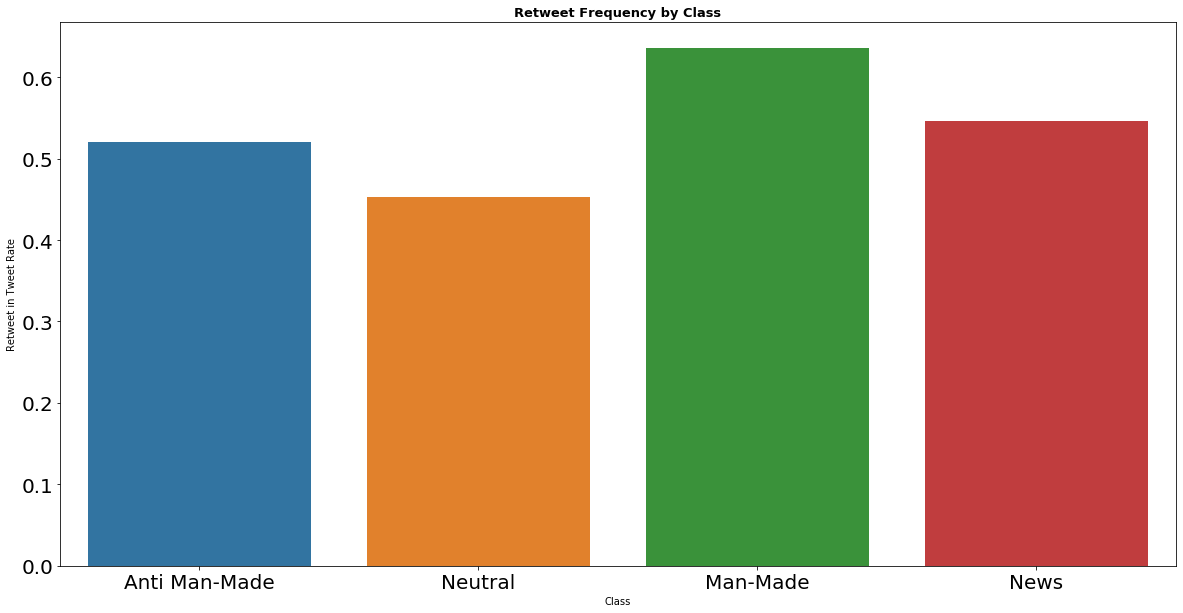

In [11]:
element_present_plot('retweet_present','RT','Retweet')

# Mentions

## Mention Present

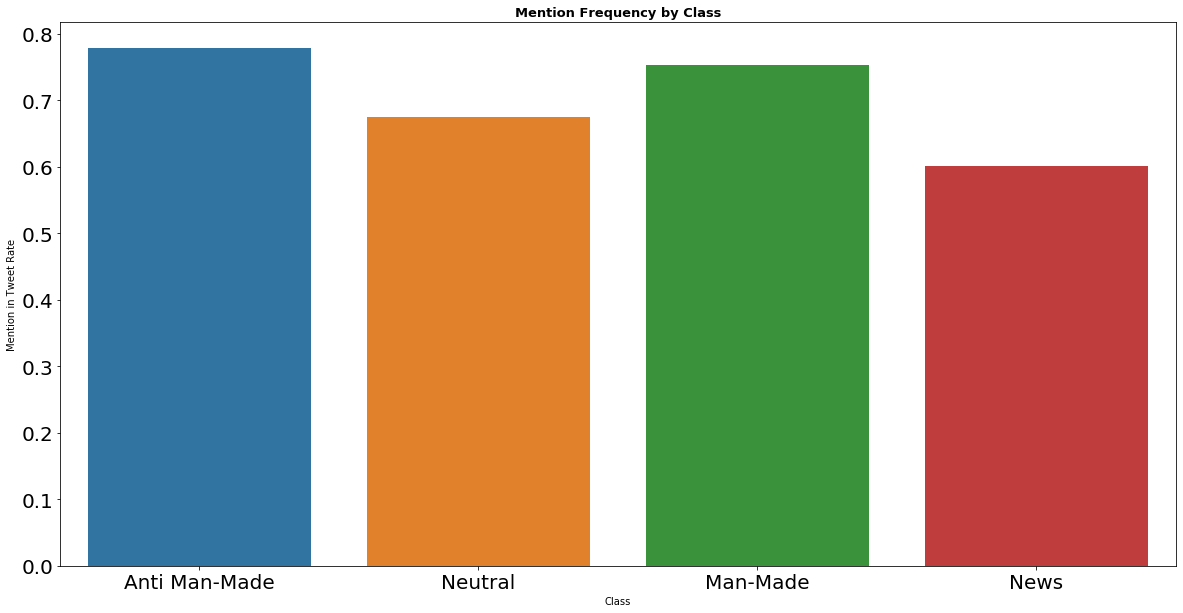

In [12]:
element_present_plot('mention_present', '@','Mention')

## Number of Mentions

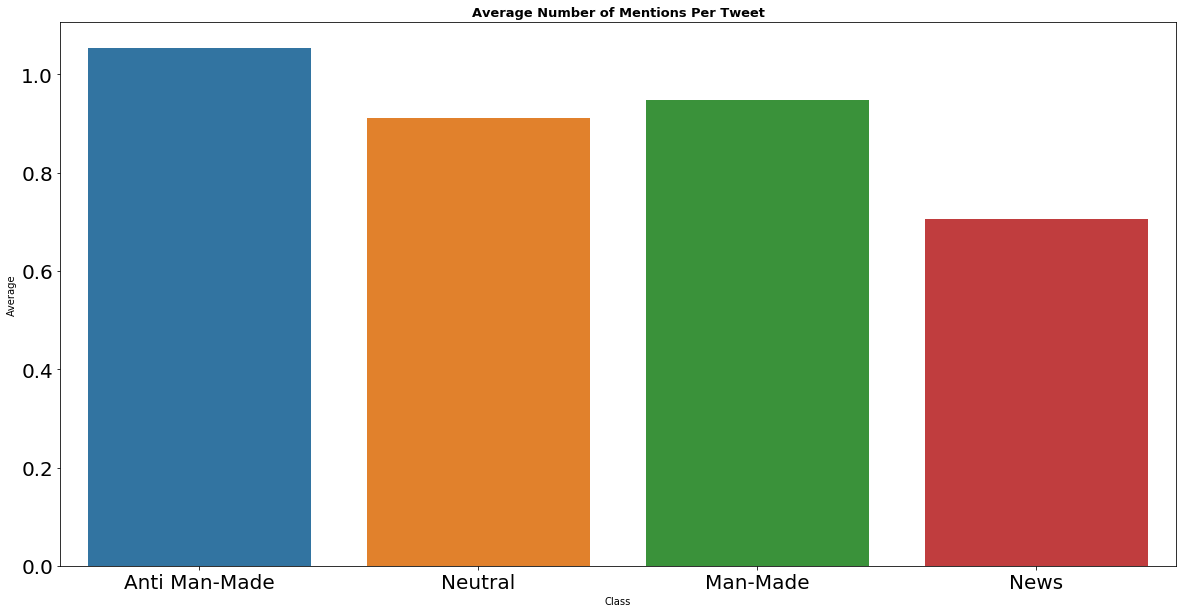

In [13]:
element_count_plot('mention_count', '@','Mention')

# Hashtags

## Hashtag Present

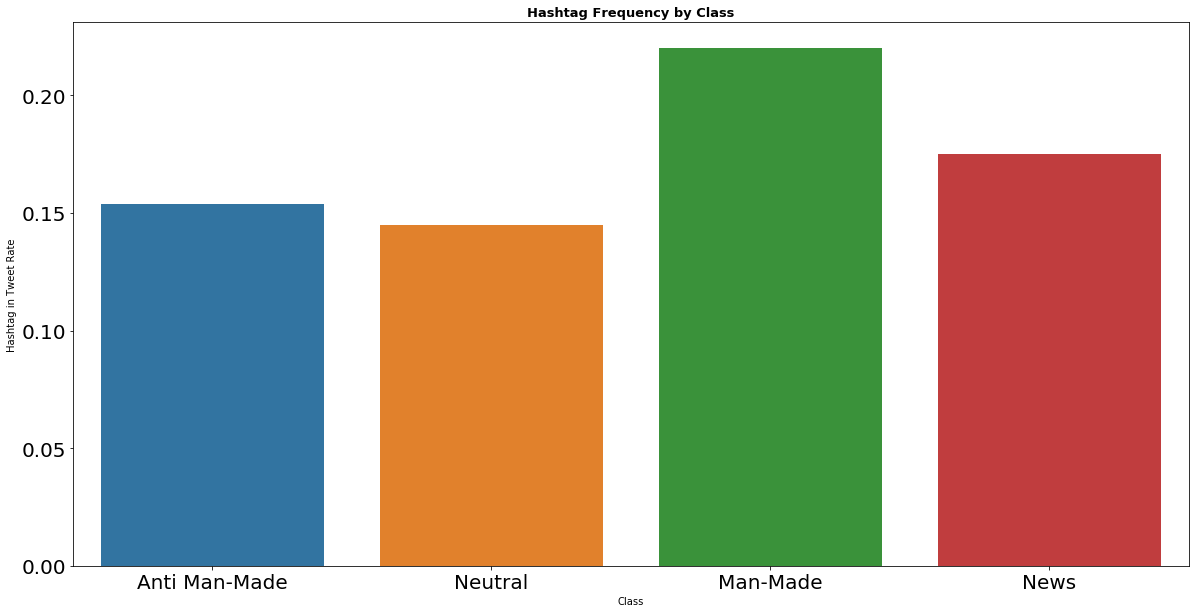

In [14]:
element_present_plot('hashtag_present', '#','Hashtag')

## Number of Hashtags

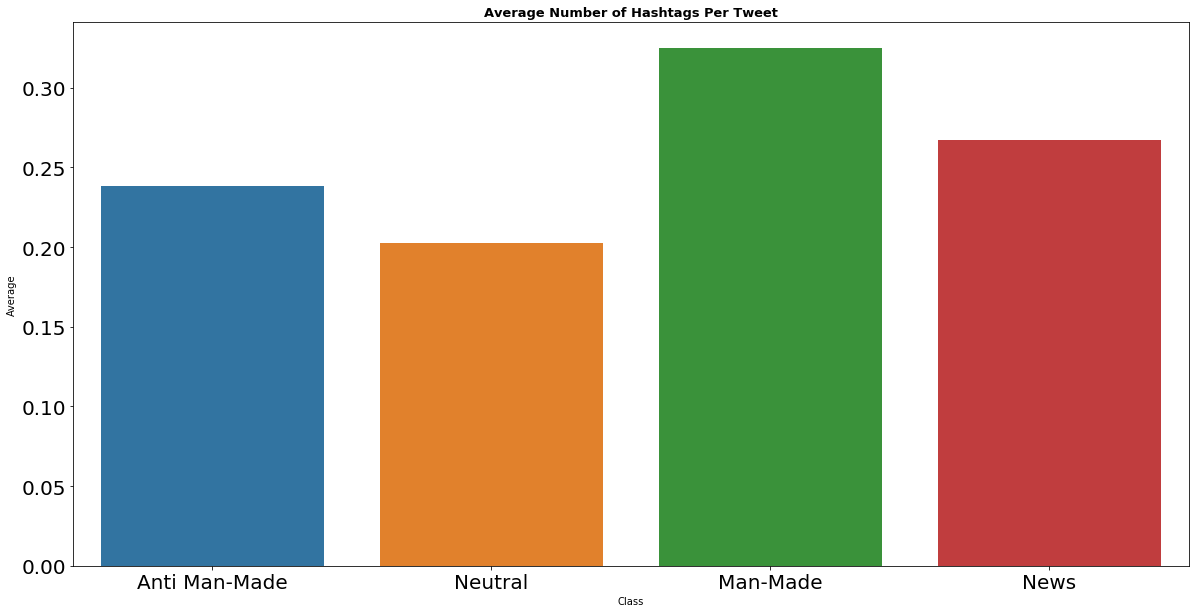

In [15]:
element_count_plot('hashtag_count', '#','Hashtag')

# Punctuation

## Exclamation Points

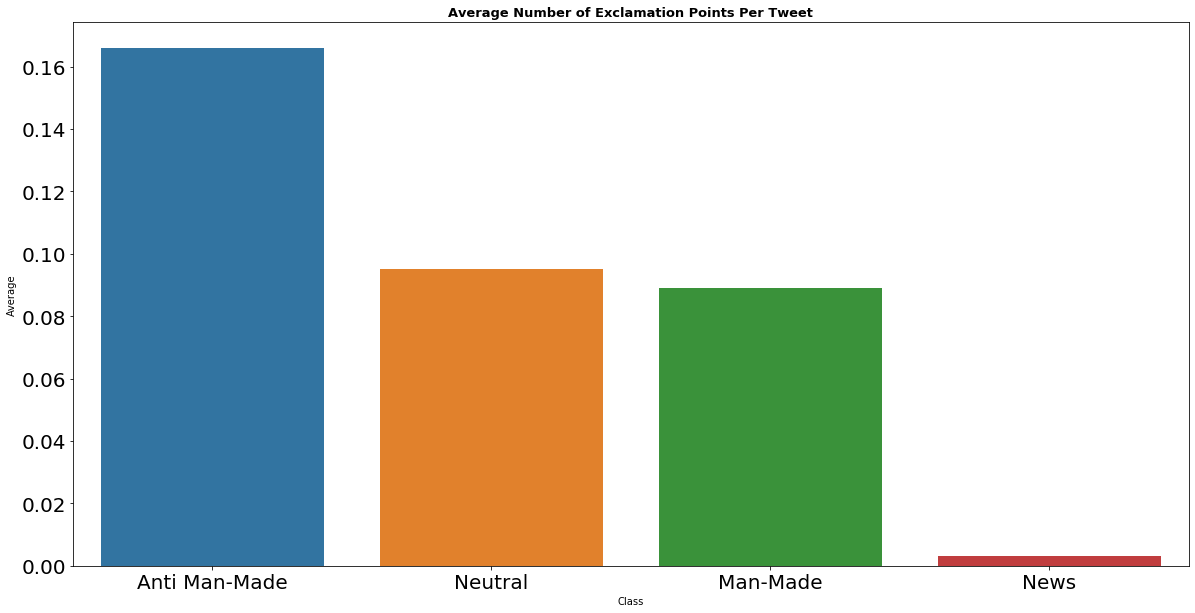

In [19]:
element_count_plot('phillip','!','Exclamation Point')

## Question Mark

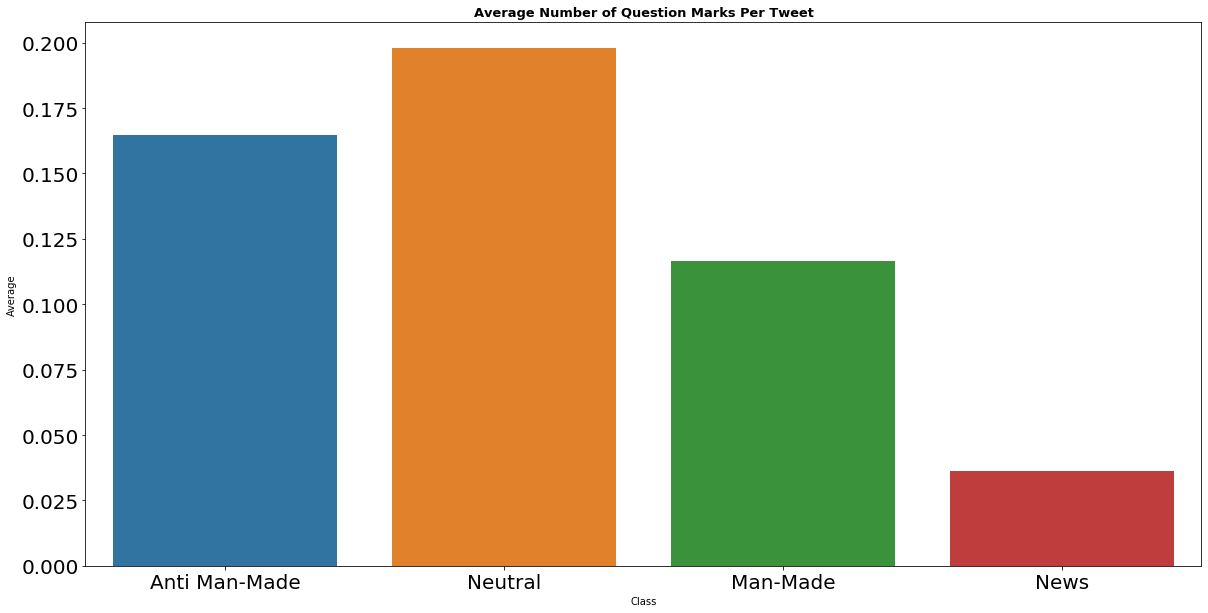

In [20]:
element_count_plot('question_mark_count','?','Question Mark')

## Dollar Sign

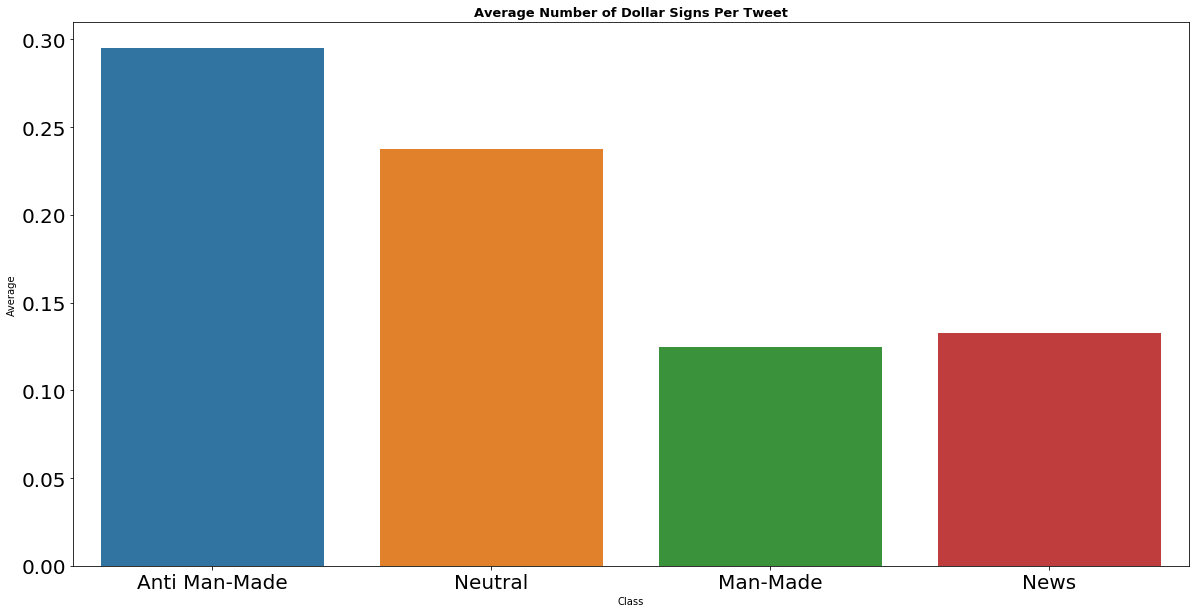

In [21]:
element_count_plot('dollar_sign_count','$','Dollar Sign')

## Percent Symbol

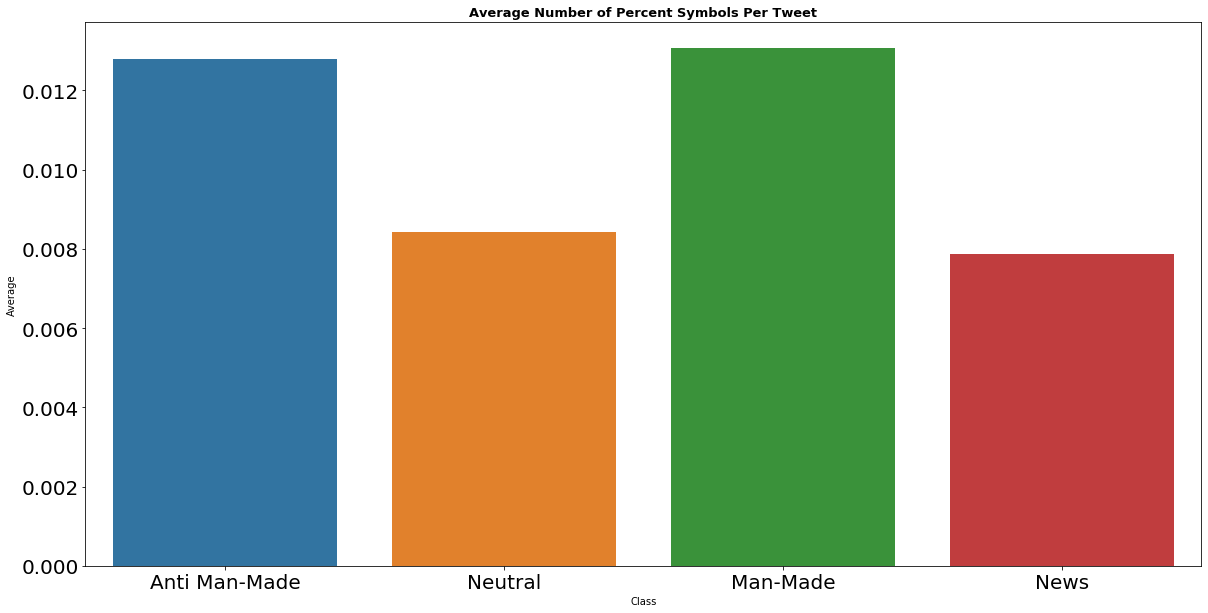

In [22]:
element_count_plot('percent_symbol_count','%','Percent Symbol')

## Colon

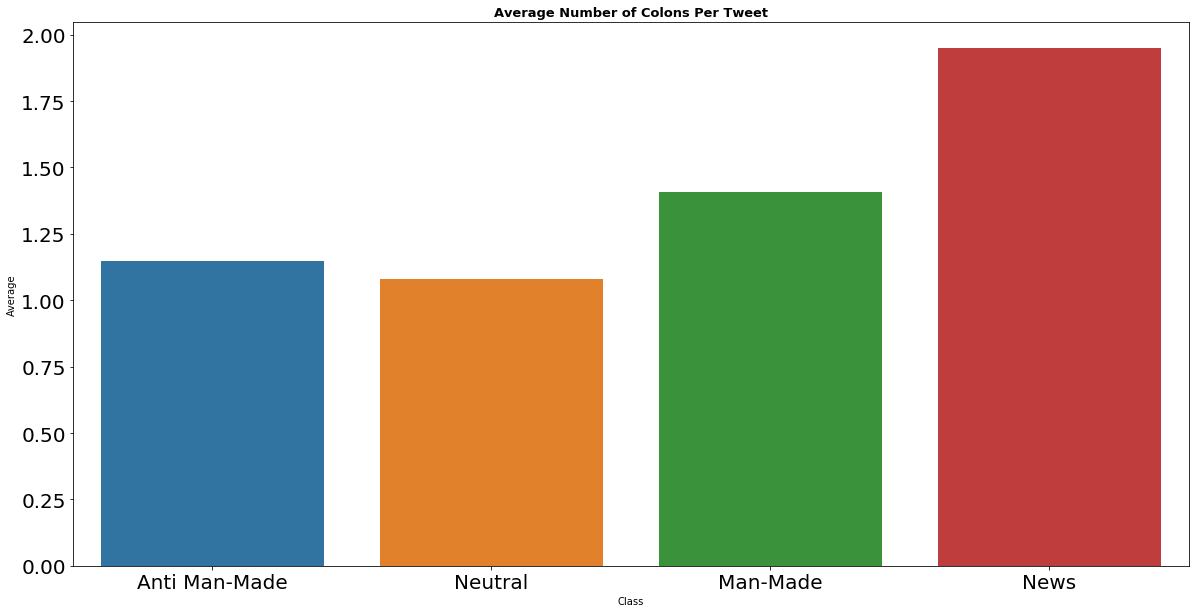

In [23]:
element_count_plot('colon_count',':','Colon')

## Semi Colon

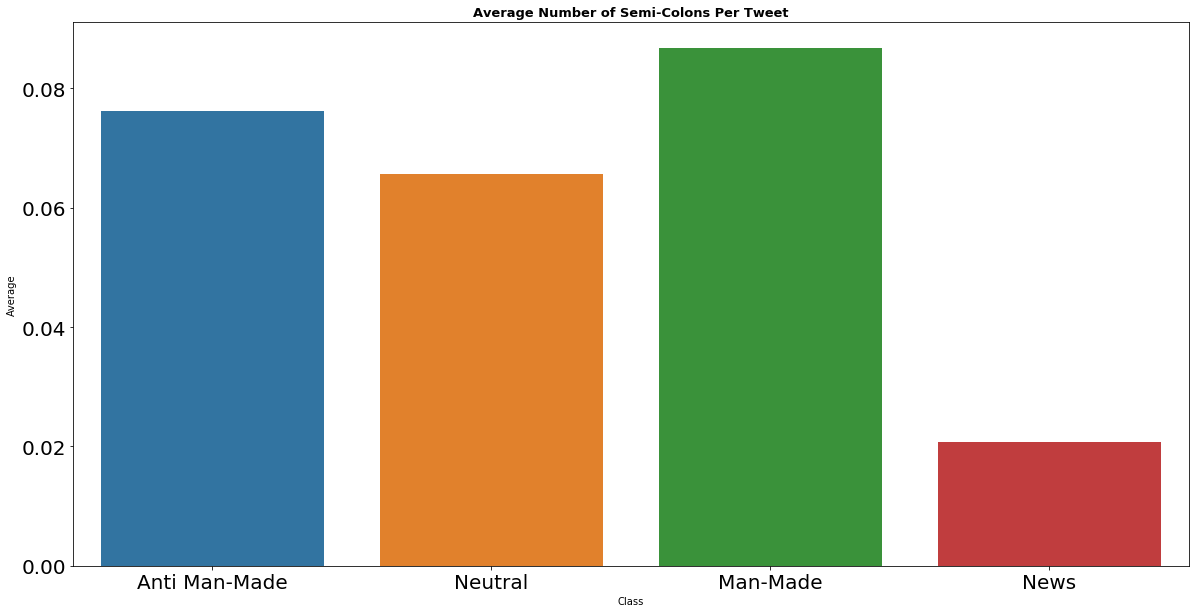

In [24]:
element_count_plot('semicolon_count',';','Semi-Colon')

# Uppercase Letters

In [9]:
# Tokenize and filter for letters
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
# Create uppercase present column
data['uppercase_present'] = data.message.apply(lambda x: tokenizer.tokenize(x))

In [10]:
# Checking if there are uppercase words per observation
data.uppercase_present = data.uppercase_present.apply(lambda x: check_uppercase(x))

Text(0, 0.5, 'Average')

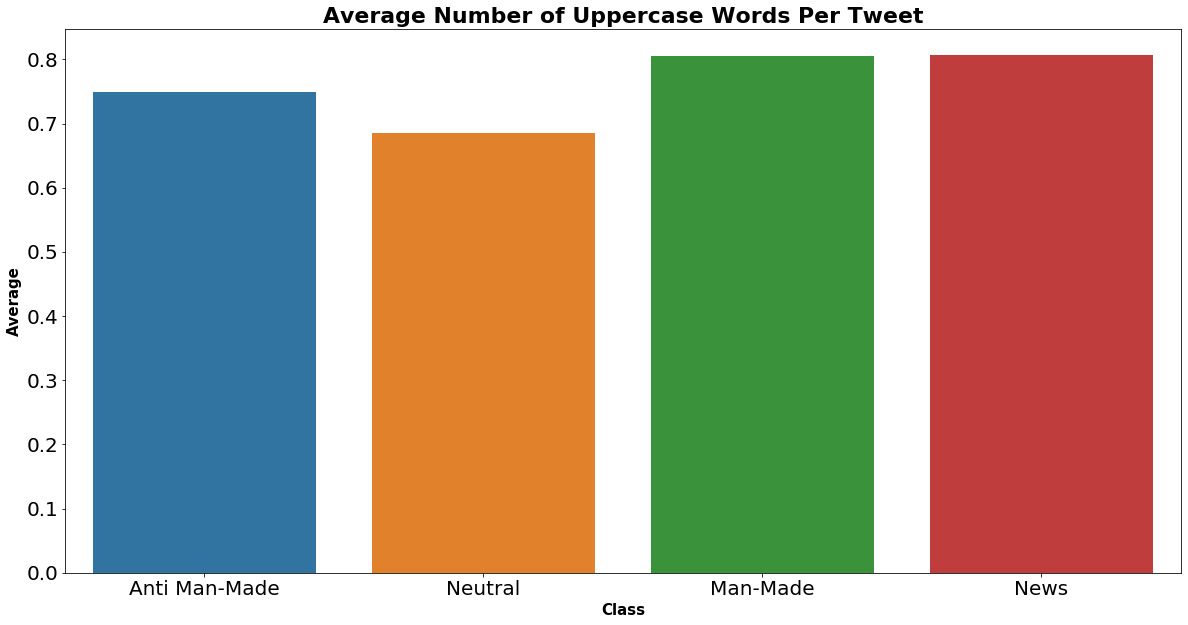

In [11]:
anti = data[data.sentiment == -1]
neutral = data[data.sentiment == 0]
man = data[data.sentiment == 1]
news = data[data.sentiment == 2]

uppercase_count_perc = ((anti.uppercase_present.sum() / len(anti)),
                       (neutral.uppercase_present.sum() / len(neutral)),
                       (man.uppercase_present.sum() / len(man)),
                       (news.uppercase_present.sum() / len(news)))
                        
                        
plt.figure(figsize=(20,10))
sns.barplot(class_labels, uppercase_count_perc)
plt.title('Average Number of Uppercase Words Per Tweet', fontsize=22, fontweight='bold')
plt.xlabel('Class', fontsize=15, fontweight='bold')
plt.ylabel('Average', fontsize=15, fontweight='bold')

# Word Associations

In [12]:
republican_party_words = load_republican_party_words()
democratic_party_words = load_democratic_party_words()
climate_change_words = load_climate_change_words()
news_words = load_news_words()

## Republican Party

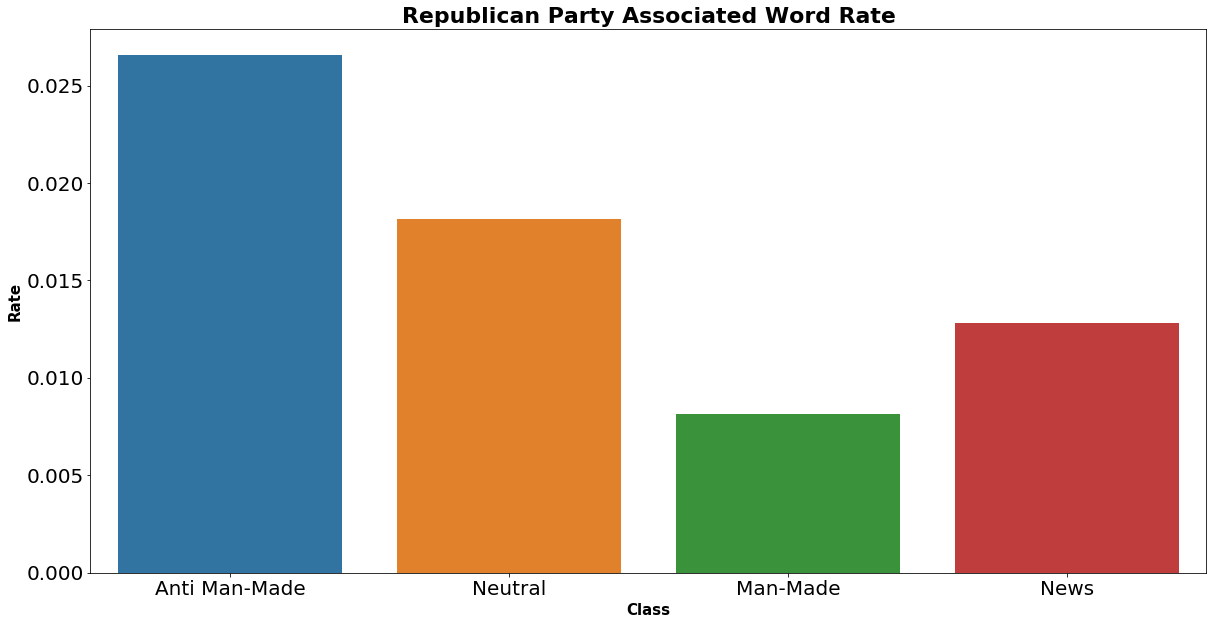

In [13]:
word_associations_plot(republican_party_words, 'Republican Party')

## Democratic Party

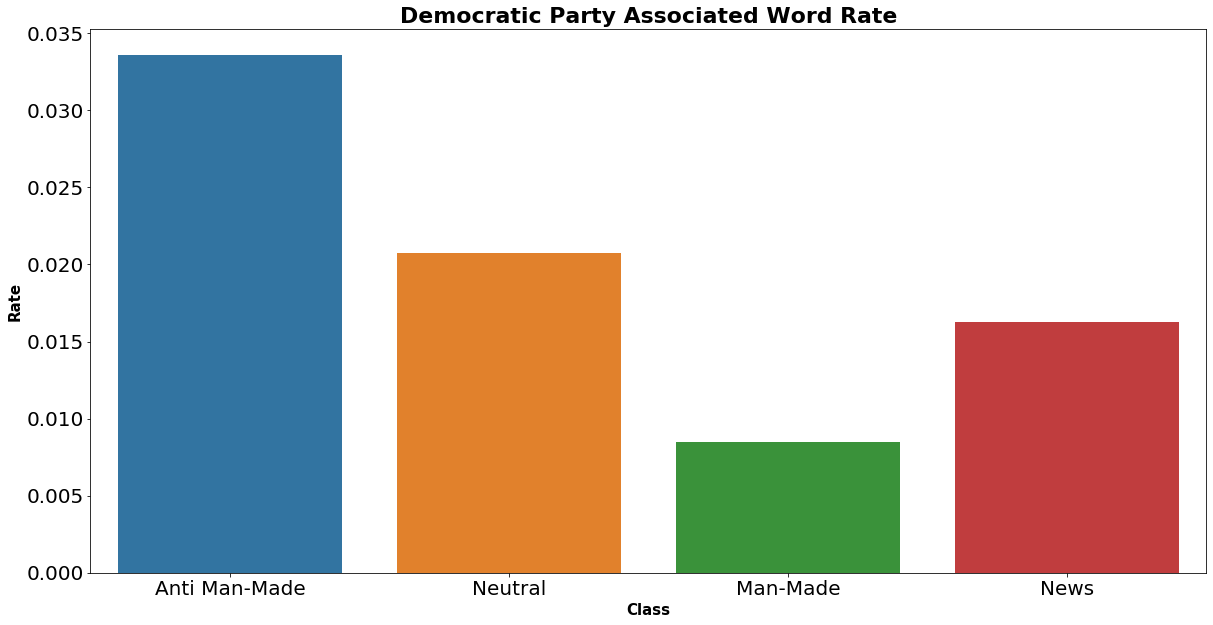

In [14]:
word_associations_plot(democratic_party_words, 'Democratic Party')

## Climate Change

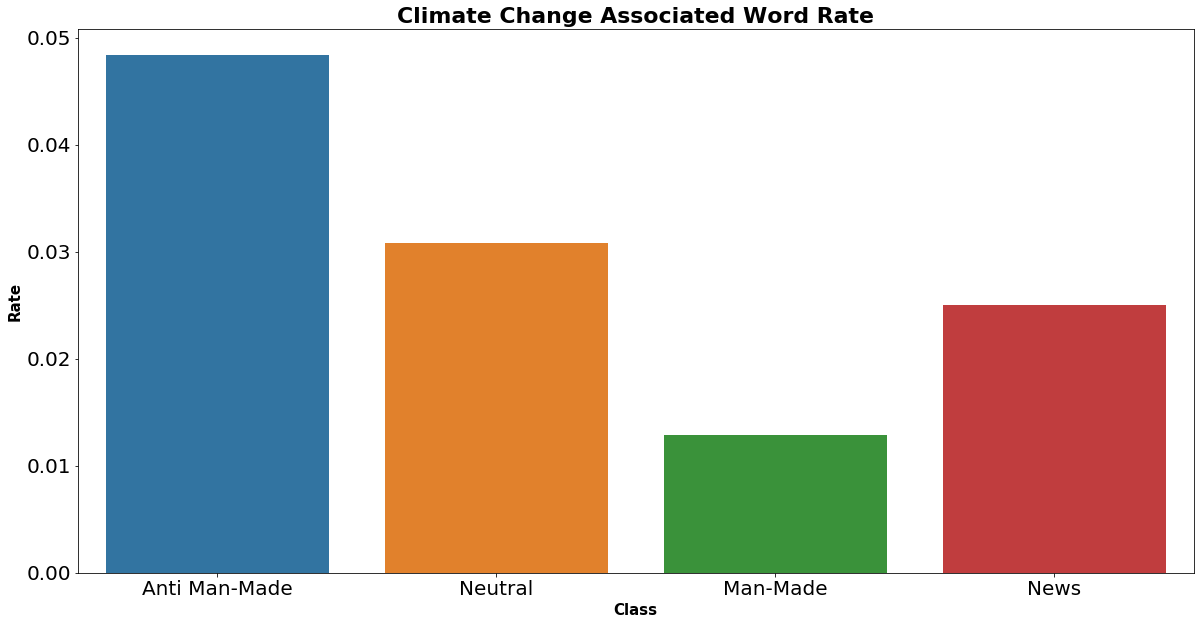

In [15]:
word_associations_plot(climate_change_words, 'Climate Change')

## News

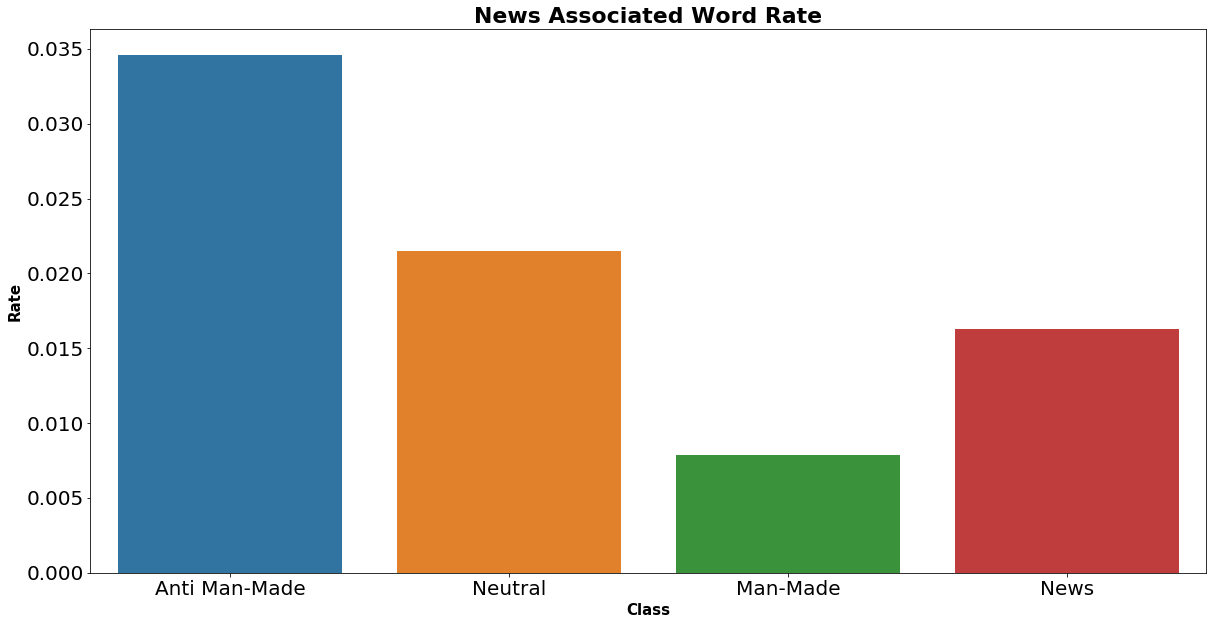

In [16]:
word_associations_plot(news_words, 'News')